# Iris data with Gaussain Naive Bayes 

In [2]:
%config Completer.use_jedi = False

In [28]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.data.shape

(150, 4)

In [8]:
iris.data.shape

(150, 4)

## EDA

In [14]:
Counter(iris.target)

Counter({0: 50, 1: 50, 2: 50})

In [16]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
group_0 = iris.data[:50]

/Users/sanghyub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


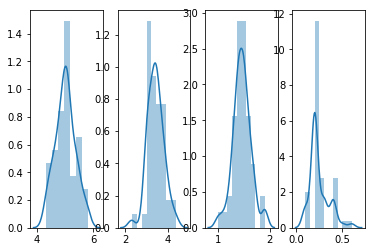

In [20]:
plt.subplot(1,4,1)
sns.distplot(group_0[:,0])

plt.subplot(1,4,2)
sns.distplot(group_0[:,1])

plt.subplot(1,4,3)
sns.distplot(group_0[:,2])

plt.subplot(1,4,4)
sns.distplot(group_0[:,3])

In [21]:
group_1 = iris.data[50:100]

/Users/sanghyub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


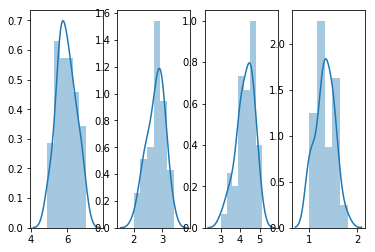

In [22]:
plt.subplot(1,4,1)
sns.distplot(group_1[:,0])

plt.subplot(1,4,2)
sns.distplot(group_1[:,1])

plt.subplot(1,4,3)
sns.distplot(group_1[:,2])

plt.subplot(1,4,4)
sns.distplot(group_1[:,3])

/Users/sanghyub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


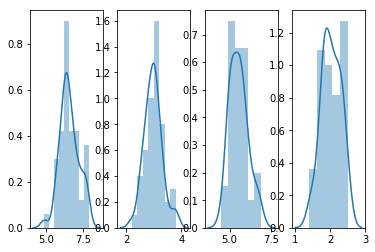

In [23]:
group_2 = iris.data[100:]

# 첫 번째 feature
plt.subplot(1,4,1)
sns.distplot(group_2[:, 0])

# 두 번째 feature
plt.subplot(1,4,2)
sns.distplot(group_2[:, 1])

# 세 번째 feature
plt.subplot(1,4,3)
sns.distplot(group_2[:, 2])

# 네 번째 feature
plt.subplot(1,4,4)
sns.distplot(group_2[:, 3])

정규분포에 근사하게 된다. Central Limit Theorem

## Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 33)

In [26]:
print('원본 데이터의 비율 :', Counter(iris.target))
print('학습 데이터의 비율 :', Counter(y_train))
print('테스트 데이터의 비율 :', Counter(y_test))

원본 데이터의 비율 : Counter({0: 50, 1: 50, 2: 50})
학습 데이터의 비율 : Counter({0: 39, 1: 35, 2: 31})
테스트 데이터의 비율 : Counter({2: 19, 1: 15, 0: 11})


## Model Training

### Preprocessing - Scaling (GNB에서는 사실 필요없지만 연습을 위해서)

In [29]:
scaler = StandardScaler()

In [32]:
scaler = scaler.fit(X_train) #학습 셋으로만 스케일링

In [33]:
scaled_train = scaler.transform(X_train)

In [34]:
scaled_test = scaler.transform(X_test)

In [35]:
gnb = GaussianNB()

In [37]:
gnb_model = gnb.fit(scaled_train, y_train)

In [38]:
pred = gnb_model.predict(scaled_train)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(pred, y_train)

0.9619047619047619

## Test

In [41]:
pred_test = gnb_model.predict(scaled_test)

In [42]:
accuracy_score(pred_test, y_test)

0.9555555555555556